In [1]:
from json import dumps
from time import sleep
from kafka import KafkaProducer
from kafka import KafkaConsumer
from json import loads
import pyspark
from pyspark.sql import *
import matplotlib.pyplot as plt
import cv2

In [2]:
consumer = KafkaConsumer(
    'my-topic',
     bootstrap_servers=['localhost:9092'],
     auto_offset_reset='earliest',
     enable_auto_commit=True,
     group_id='my-group',
     value_deserializer=lambda x: loads(x.decode('utf-8')))

In [3]:
sc = pyspark.SparkContext()
sqlContext = SQLContext(sc)

/home/patate/.local/lib/python3.8/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
df = []

In [ ]:
count = 0
for message in consumer:
    # message value and key are raw bytes -- decode if necessary!
    # e.g., for unicode: `message.value.decode('utf-8')`
    print ("%s:%d:%d:" % (message.topic, message.partition,
                                          message.offset))
    id = message.value['id']
    date = message.value['date']
    data = message.value['data']
    
    df.append(pyspark.Row(id=id, date=date, data=data))

In [20]:
df2 = sqlContext.createDataFrame(df)
df2.show()

+----+--------------------+--------------------+
|  id|                date|                data|
+----+--------------------+--------------------+
|1313|"2021-12-15T13:16...|[[[130, 131, 134]...|
|1313|"2021-12-15T13:16...|[[[39, 73, 227], ...|
|1313|"2021-12-15T13:16...|[[[240, 208, 209]...|
|1313|"2021-12-15T13:17...|[[[213, 141, 215]...|
|1313|"2021-12-15T13:17...|[[[136, 41, 116],...|
|1313|"2021-12-15T13:17...|[[[103, 114, 161]...|
|1313|"2021-12-15T13:17...|[[[115, 168, 135]...|
|1313|"2021-12-15T13:17...|[[[75, 173, 88], ...|
|1313|"2021-12-15T13:17...|[[[210, 115, 185]...|
|1313|"2021-12-15T13:17...|[[[227, 9, 248], ...|
|1313|"2021-12-15T13:18...|[[[240, 186, 38],...|
|1313|"2021-12-15T13:18...|[[[76, 94, 4], [7...|
|1313|"2021-12-15T13:18...|[[[139, 51, 158],...|
|1313|"2021-12-15T13:18...|[[[183, 179, 94],...|
|1313|"2021-12-15T13:18...|[[[163, 92, 130],...|
|1313|"2021-12-15T13:18...|[[[40, 206, 61], ...|
|2176|"2021-12-15T13:20...|[[[81, 248, 60], ...|
|2176|"2021-12-15T13

In [21]:
def to_numpy(img):
    img = np.array([np.array(x, dtype=np.float32) for x in img]) / 255
    return img

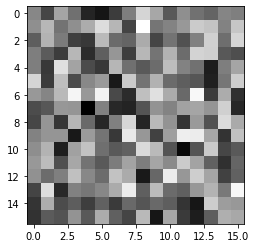

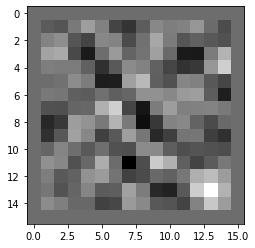

In [22]:
import numpy as np

#select all data from df2 and store it in a df named images
images = df2.select('data')
for e in images.collect():
    img = to_numpy(loads(e.data))
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    with_sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)
    plt.imshow(gray, cmap='gray')
    plt.show()
    plt.imshow(with_sobel, cmap='gray')
    plt.show()
    break

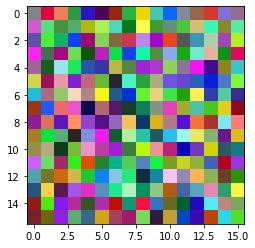

In [32]:
# sql request to get all the images with some id
images_client1 = df2.select('data').where(df2.id == (df2.select('id').distinct().collect()[0][0]))

for image in images_client1.collect():
    plt.imshow(to_numpy(loads(image.data)))
    plt.show()
    break